IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from sklearn.multiclass import OneVsRestClassifier

# Model libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# remove warnings
import warnings
warnings.filterwarnings('ignore')

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERAT

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df,ignore_index=True)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


In [4]:
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.032100   0.017081   -0.399284   0.134398         78.0   
1       1.0 -0.032346   0.017054   -0.400010   0.134356        102.0   
2       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
3       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
4       4.0 -0.033265   0.017017   -0.412325   0.134447        102.0   
...     ...       ...        ...         ...        ...          ...   
1344   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1345   63.0 -0.048289   0.006253   -0.081993   0.092571          0.0   
1346   64.0 -0.048212   0.006240   -0.075446   0.092463          0.0   
1347   65.0 -0.048179   0.006225   -0.068067   0.092367          0.0   
1348   66.0 -0.048194   0.006211   -0.061448   0.092295          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            96.0    3.596543    3.414090 -0.014483  ... 

In [5]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.032100   0.017081   -0.399284   0.134398         78.0         96.0   
1    -0.032346   0.017054   -0.400010   0.134356        102.0         80.0   
2    -0.032590   0.017026   -0.400594   0.134314         98.0         79.0   
3    -0.032832   0.016999   -0.401113   0.134271        102.0         71.0   
4    -0.033265   0.017017   -0.412325   0.134447        102.0         87.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.048472   0.006254   -0.082119   0.092673          0.0        119.0   
1345 -0.048289   0.006253   -0.081993   0.092571          0.0        118.0   
1346 -0.048212   0.006240   -0.075446   0.092463          0.0        119.0   
1347 -0.048179   0.006225   -0.068067   0.092367          0.0        130.0   
1348 -0.048194   0.006211   -0.061448   0.092295          0.0        113.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

In [6]:
correlated_features = set()
correlation = df_1[df_1.columns[1:]].corr()['Guasto'][:].abs()
correlation = correlation.loc[lambda x : ((x > 0.7) & (x < 1))]
index = correlation.index
print(index)
df_1 = df_1.drop([col for col in df_1.columns if col in index],axis=1)
print(df_1.columns)

Index(['<>(RPM(ESC_5))', 'RMS(RPM(ESC_5))'], dtype='object')
Index(['<>(GyrX)', 'var(GyrX)', 'kurt(GyrX)', 'RMS(GyrX)', 'freq1(GyrX)',
       'freq2(GyrX)', 'amp1(GyrX)', 'amp2(GyrX)', '<>(GyrY)', 'var(GyrY)',
       ...
       'amp2(RPM(ESC_5))', '<>(Curr(ESC_5))', 'var(Curr(ESC_5))',
       'kurt(Curr(ESC_5))', 'RMS(Curr(ESC_5))', 'freq1(Curr(ESC_5))',
       'freq2(Curr(ESC_5))', 'amp1(Curr(ESC_5))', 'amp2(Curr(ESC_5))',
       'Guasto'],
      dtype='object', length=167)


In [7]:
index_list = [340]
df_test = df_1.query('index in @index_list')
#df_test = pd.DataFrame(df_test)
print(df_test)

     <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
340 -0.026384   0.060718    1.577281   0.247549         95.0        121.0   

     amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RPM(ESC_5))  \
340   16.076235    8.890075 -0.039243   0.033415  ...      10124.700219   

     <>(Curr(ESC_5))  var(Curr(ESC_5))  kurt(Curr(ESC_5))  RMS(Curr(ESC_5))  \
340         3.881828          0.242896          -0.574502          3.912921   

     freq1(Curr(ESC_5))  freq2(Curr(ESC_5))  amp1(Curr(ESC_5))  \
340               172.0               171.0          71.883439   

     amp2(Curr(ESC_5))  Guasto  
340          19.491861       2  

[1 rows x 167 columns]


In [8]:
# Drop values to avoid multicolinearity
df_test = df_test.drop(['Guasto'], axis=1)

In [9]:
#df_1 = df_1.drop([df_1.index[1330], df_1.index[1331]])
df_1 = df_1.drop([df_1.index[340]])
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.032100   0.017081   -0.399284   0.134398         78.0         96.0   
1    -0.032346   0.017054   -0.400010   0.134356        102.0         80.0   
2    -0.032590   0.017026   -0.400594   0.134314         98.0         79.0   
3    -0.032832   0.016999   -0.401113   0.134271        102.0         71.0   
4    -0.033265   0.017017   -0.412325   0.134447        102.0         87.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.048472   0.006254   -0.082119   0.092673          0.0        119.0   
1345 -0.048289   0.006253   -0.081993   0.092571          0.0        118.0   
1346 -0.048212   0.006240   -0.075446   0.092463          0.0        119.0   
1347 -0.048179   0.006225   -0.068067   0.092367          0.0        130.0   
1348 -0.048194   0.006211   -0.061448   0.092295          0.0        113.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

### Bilanciamento del dataset

In [10]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]

In [11]:
oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.032100   0.017081   -0.399284   0.134398    78.000000    96.000000   
1    -0.032346   0.017054   -0.400010   0.134356   102.000000    80.000000   
2    -0.032590   0.017026   -0.400594   0.134314    98.000000    79.000000   
3    -0.032832   0.016999   -0.401113   0.134271   102.000000    71.000000   
4    -0.033265   0.017017   -0.412325   0.134447   102.000000    87.000000   
...        ...        ...         ...        ...          ...          ...   
1615 -0.110011   0.039917   -0.443189   0.227833    54.887640    76.812733   
1616  0.005513   0.007453   -0.420295   0.086393     0.000000    89.074267   
1617 -0.009879   0.011890    2.214646   0.109350    59.594765    72.919899   
1618 -0.121656   0.037362   -0.318758   0.228187    79.796315    58.993858   
1619 -0.024124   0.009759    2.416980   0.101565    78.175081    59.109426   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp1(RP

# Selezione feature più importanti

In [12]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_regression, k=40)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

SelectKBest(k=40, score_func=<function f_regression at 0x000002653D4A1120>)
[ True False False False  True False False False  True  True False  True
  True False  True  True False  True  True  True False False  True False
 False False False False  True False  True False  True False  True  True
 False False False False False False False False False False False False
 False False False False False False False False False  True False  True
 False False  True False False False False False False False False False
 False False False False  True  True  True False  True  True False  True
 False False False False False False False False  True  True False False
 False  True False False False False False False  True False False  True
 False False False False False  True False False False False False False
 False False False False  True  True False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False

In [13]:
features_score = pd.DataFrame(fit.scores_)
features_score = zscore(features_score)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(60,columns="F_Score"))

        Input_Features   F_Score
34          kurt(AccY)  5.328183
28         freq1(AccX)  3.484674
12         freq1(GyrY)  3.205510
11           RMS(GyrY)  2.833152
9            var(GyrY)  2.687893
153   kurt(RPM(ESC_5))  2.569084
93   freq2(RPM(ESC_1))  2.513066
92   freq1(RPM(ESC_1))  2.497841
14          amp1(GyrY)  2.472074
159   var(Curr(ESC_5))  2.241886
104     <>(RPM(ESC_2))  1.966367
8             <>(GyrY)  1.920499
152    var(RPM(ESC_5))  1.786204
78    amp1(RPM(ESC_0))  1.758842
107    RMS(RPM(ESC_2))  1.638947
32            <>(AccY)  1.600842
22          amp1(GyrZ)  1.532004
62         amp1(Pitch)  1.233878
30          amp1(AccX)  1.139693
76   freq1(RPM(ESC_0))  1.101420
17           var(GyrZ)  1.006927
80     <>(Curr(ESC_0))  0.992788
77   freq2(RPM(ESC_0))  0.956524
4          freq1(GyrX)  0.893410
57          var(Pitch)  0.887037
19           RMS(GyrZ)  0.878205
156   amp1(RPM(ESC_5))  0.822494
81    var(Curr(ESC_0))  0.743123
97    var(Curr(ESC_1))  0.635011
15        

In [14]:
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[1, 2, 3, 5, 6, 7, 10, 13, 16, 20, 21, 23, 24, 25, 26, 27, 29, 31, 33, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 79, 82, 84, 85, 86, 87, 88, 89, 90, 91, 94, 95, 96, 98, 99, 100, 101, 102, 103, 105, 106, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 154, 155, 157, 160, 161, 162, 163, 164, 165]


In [15]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      <>(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  freq1(GyrY)  \
0    -0.032100    78.000000 -0.014483   0.028038   0.167832     0.000000   
1    -0.032346   102.000000 -0.014131   0.028001   0.167695     0.000000   
2    -0.032590    98.000000 -0.013642   0.028006   0.167669     0.000000   
3    -0.032832   102.000000 -0.013156   0.028010   0.167644     0.000000   
4    -0.033265   102.000000 -0.013003   0.027940   0.167422     0.000000   
...        ...          ...       ...        ...        ...          ...   
1615 -0.110011    54.887640  0.048148   0.010559   0.113347    98.700374   
1616  0.005513     0.000000  0.016124   0.005764   0.077515   105.814853   
1617 -0.009879    59.594765  0.061781   0.011010   0.121649    98.053926   
1618 -0.121656    79.796315  0.038213   0.010323   0.108434   103.395086   
1619 -0.024124    78.175081 -0.008255   0.006303   0.079713   109.737379   

      amp1(GyrY)  amp2(GyrY)  var(GyrZ)  kurt(GyrZ)  ...  RMS(RPM(ESC_2))  \
0      30.

In [16]:
df_test=df_test.drop(df_test.columns[index_false],axis = 1)
print(df_test)

     <>(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  freq1(GyrY)  \
340 -0.026384         95.0 -0.039243   0.033415   0.186767          0.0   

     amp1(GyrY)  amp2(GyrY)  var(GyrZ)  kurt(GyrZ)  ...  RMS(RPM(ESC_2))  \
340    15.95838    8.050098   0.017186   -1.519067  ...      5351.385837   

     var(Curr(ESC_2))  freq1(RPM(ESC_3))  freq2(RPM(ESC_3))  kurt(RPM(ESC_4))  \
340          0.427856              100.0               99.0         -0.901573   

     var(RPM(ESC_5))  kurt(RPM(ESC_5))  amp1(RPM(ESC_5))  <>(Curr(ESC_5))  \
340    468885.791658          0.000428      11341.412155         3.881828   

     var(Curr(ESC_5))  
340          0.242896  

[1 rows x 40 columns]


In [17]:
correlated_features = set()
correlation_matrix = x.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if (correlation_matrix.iloc[i, j] > 0.8) | (correlation_matrix.iloc[i, j] < -0.5):
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

x = x.drop([col for col in x.columns if col in correlated_features],axis=1)
print(x)

      <>(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  kurt(GyrZ)  RMS(GyrZ)  \
0    -0.032100    78.000000 -0.014483   0.014169   -1.421637   0.197959   
1    -0.032346   102.000000 -0.014131   0.014150   -1.421505   0.197715   
2    -0.032590    98.000000 -0.013642   0.014126   -1.420411   0.197485   
3    -0.032832   102.000000 -0.013156   0.014101   -1.419275   0.197256   
4    -0.033265   102.000000 -0.013003   0.014082   -1.418967   0.197016   
...        ...          ...       ...        ...         ...        ...   
1615 -0.110011    54.887640  0.048148   0.004524   -0.937512   0.131408   
1616  0.005513     0.000000  0.016124   0.005849   -0.912434   0.160537   
1617 -0.009879    59.594765  0.061781   0.004974   -1.382978   0.108824   
1618 -0.121656    79.796315  0.038213   0.005123   -1.216837   0.124597   
1619 -0.024124    78.175081 -0.008255   0.004722   -1.396472   0.111575   

      amp1(GyrZ)  var(Curr(ESC_1))  <>(RPM(ESC_2))  var(Curr(ESC_2))  \
0       1.463315          0

In [18]:
df_test=df_test.drop([col for col in df_test.columns if col in correlated_features],axis=1)
print(df_test)

     <>(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  kurt(GyrZ)  RMS(GyrZ)  \
340 -0.026384         95.0 -0.039243   0.017186   -1.519067   0.208906   

     amp1(GyrZ)  var(Curr(ESC_1))  <>(RPM(ESC_2))  var(Curr(ESC_2))  \
340    0.659428          0.985391     5232.414097          0.427856   

     kurt(RPM(ESC_4))  
340         -0.901573  


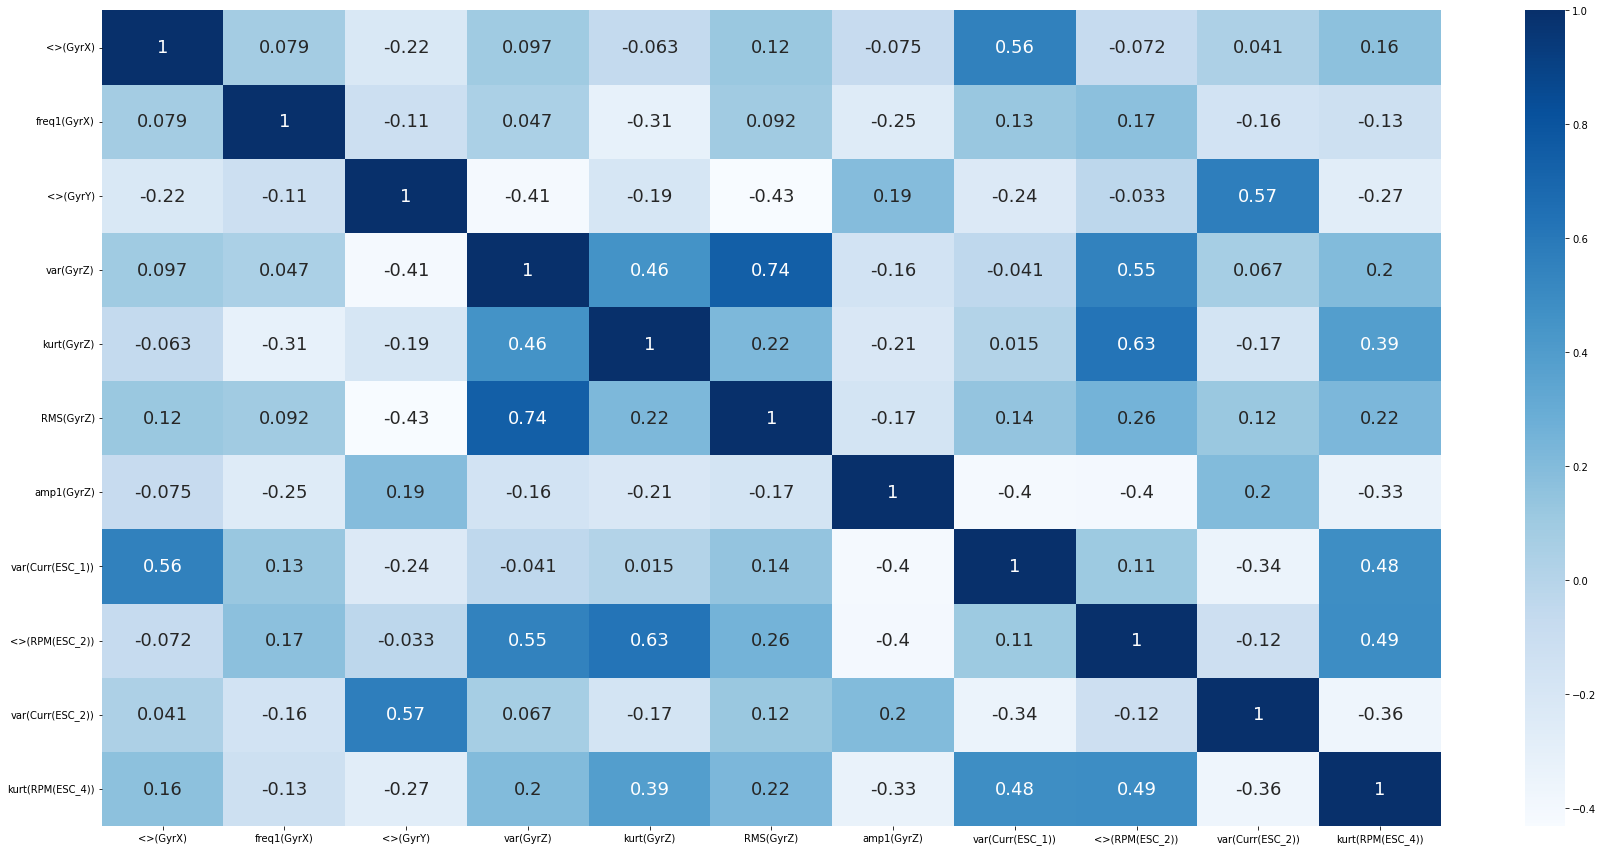

In [19]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

### Separazione del dataset in training e test

In [20]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1296, 11)
(324, 11)
(1296, 1)
(324, 1)


In [21]:
from sklearn.calibration import CalibratedClassifierCV

# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    SVC(probability=True),
    MLPClassifier(random_state=rs), # Multi Layer Perceptron
    SGDClassifier(random_state=rs) # Stochastic Gradient Descent 
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

### Classificazione

Cross-Validation: [0.81153846 0.81467181 0.81081081 0.81081081 0.77606178]
Accuracy: 0.78 	 ---> LogisticRegression 
Test: 2    1
Name: Guasto_test, dtype: int64


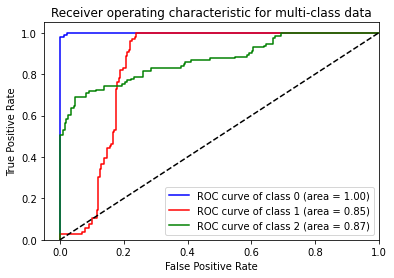

----------------------------------------------------
Cross-Validation: [0.65384615 0.63706564 0.64092664 0.62548263 0.64092664]
Accuracy: 0.66 	 ---> SVC 
Test: 1    1
Name: Guasto_test, dtype: int64


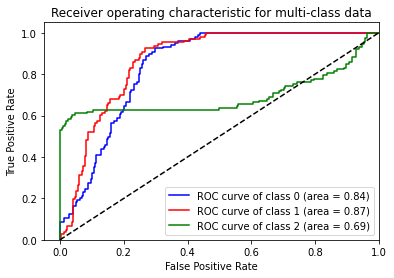

----------------------------------------------------
Cross-Validation: [0.53846154 0.32818533 0.33590734 0.33590734 0.48648649]
Accuracy: 0.59 	 ---> MLPClassifier 
Test: 1    1
Name: Guasto_test, dtype: int64


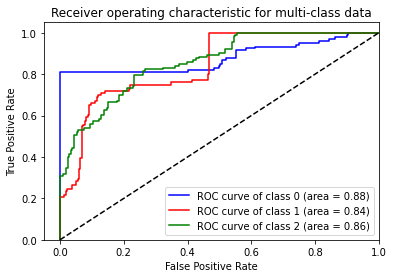

----------------------------------------------------
Cross-Validation: [0.40384615 0.54054054 0.32818533 0.4980695  0.46718147]
Accuracy: 0.52 	 ---> SGDClassifier 
Test: 2    1
Name: Guasto_test, dtype: int64


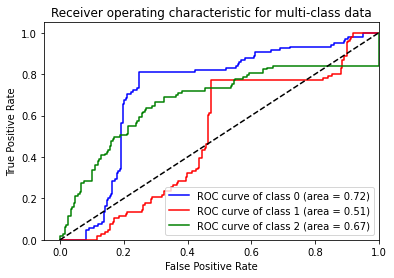

----------------------------------------------------


In [22]:
from itertools import cycle
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

n_classes = 3

j=0
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)) # qui invece abbiamo cross validation
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) # accuratezza semplice con training e test
    train_pred = clf.predict(x_test)
    print(f'Cross-Validation: {cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)}') 
    
    print(f'Accuracy: {acc} \t ---> {name} ')

    guasto_pred = pd.Series(model.predict(df_test), name='Guasto_test')
    conteggio = guasto_pred.value_counts()
    print(f'Test: {conteggio}')

    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    #fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)

    if j != 2:
        clf = OneVsRestClassifier(clf)
        y_score = clf.fit(x_train, y_train).decision_function(x_test)
    else:
        y_score = clf.fit(x_train, y_train).predict_proba(x_test)

       

    lb = LabelBinarizer()
    y_true_bin = lb.fit_transform(y_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()
    
    j += 1

    print("----------------------------------------------------")

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


### Matrici di confusione

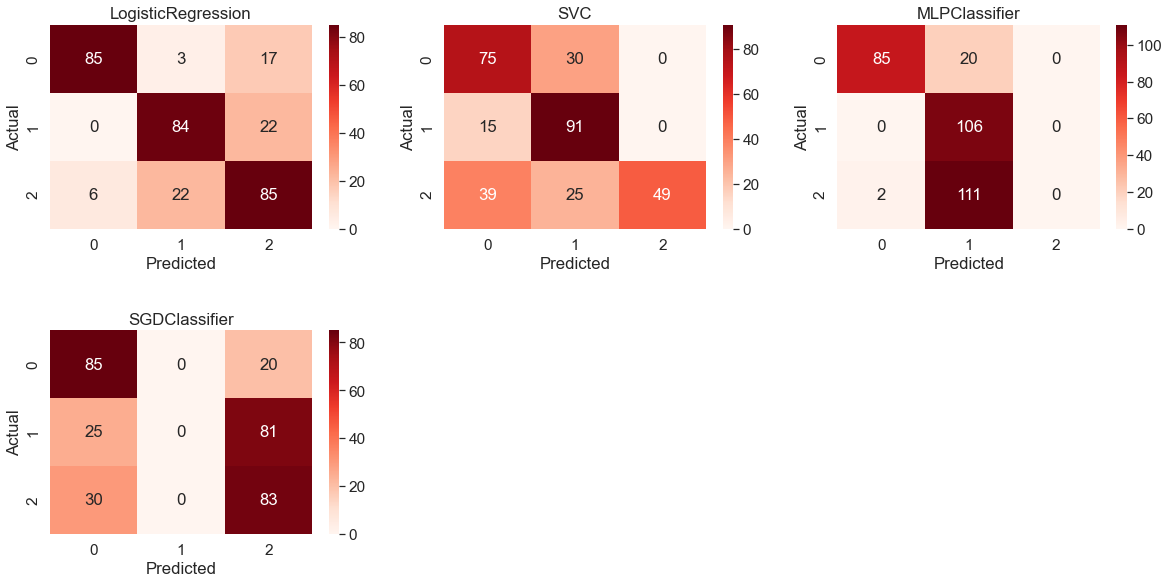

In [23]:
import seaborn as sns
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

Cross Validation Scores

Text(0.5, 1.0, 'Cross validation scores')

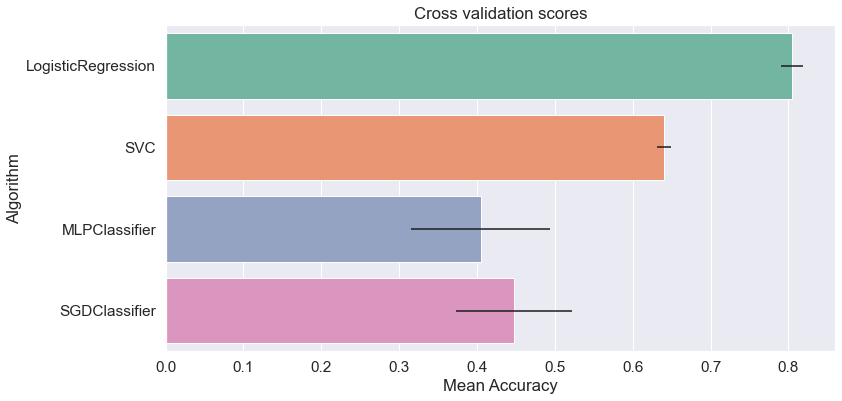

In [24]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

Report Classificazione

In [25]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       105
           1       0.77      0.79      0.78       106
           2       0.69      0.75      0.72       113

    accuracy                           0.78       324
   macro avg       0.80      0.78      0.79       324
weighted avg       0.79      0.78      0.79       324

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.71      0.64       105
           1       0.62      0.86      0.72       106
           2       1.00      0.43      0.60       113

    accuracy                           0.66       324
   macro avg       0.73      0.67      0.66       324
weighted avg       0.74      0.66      0.66       324

MLPClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.81      0.89       105
           1       0.45